In [1]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.
c:\programdata\anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\tf1\lib\site-packages\t

In [2]:
classifier = load_model("D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\Dance_classification.hdf5")
classifier.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)          

In [4]:
# converting images to numoy arrays
train_data_array = ImageDataGenerator(rescale=1/255)
image_size = 200
train_data_generator = train_data_array.flow_from_directory("D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\train\\final_train_dir",
                                                           target_size=(image_size,image_size),
                                                           class_mode= 'sparse')

Found 364 images belonging to 8 classes.


 predicted ------->  kathakali


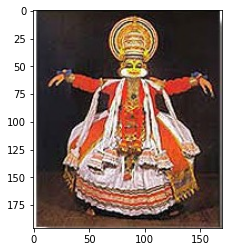

In [6]:
# Prediction on single image
from keras.preprocessing import image
%matplotlib inline

img_path = "D:\\Data Science\\I neuron\\Deep Learning\\codes\\Dance classification\\dataset\\validation\\test\\198.jpg"
test_image = image.load_img(img_path, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

pred = classifier.predict(test_image)
#print(pred)
predicted_class_indices=np.argmax(pred,axis=1)
#print(predicted_class_indices)S
labels = (train_data_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
#print(predictions)
img = mpimg.imread(img_path)
plt.imshow(img)

print(' predicted -------> ',predictions[0])